## Digits and characters Recogniton with Neural Network (No Library used for NN)

##### A neural network will be created to recoginze digits and characters. 
##### The data set used is the EMNIST dataset containing  697931 rows and 62 columns.   
##### The first column of the dataset is the true label of the image, the folowing columns are an array representation of the image. We will read the data, split it as training and test test, create our model as Matrices and train the model with backpropagation algorithm.
##### Many epochs will be run. The forward and bckpropagation algorithms are implmented in ths code, not through a library.  Finally some test and examples are made to evaluate the model.

### Import the libraries and create the functions we will use in the code:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image
np.set_printoptions(precision=6)

### Activation  Function:

In [2]:
def sigmoid(v):
    return (1 / (1+ np.exp(-v)) )

### Mean Square Error funciton:

In [6]:
def MSE(y, yhat):
    m =len(y)
    err = 0.0
    for i in range(m):
        err += np.square(y[i]-yhat[i])
    err = (1/2*m)*err
    return(err)

### ADD bias Function:

In [7]:
def add_bias(X_):
    return np.append(X_,1)

### Forward Propagatoin using a matrix, input and the sigmoid function by default:

In [8]:
def forward_prop(W_,X_,fn=sigmoid):
    if W_.shape[1] != X_.shape[0]:
        print("The matrix columns and the input length are not similar.")
        return
    output = fn(np.matmul(W_,X_)) #the sigmoid of the scalar product of X and column i of W
    return output

### Delta of the output layer:

In [9]:
def delta_output_layer_fn(W_output_, desired_,  Y_in_, a=1):
    output_ = forward_prop(W_output_,Y_in_)
    delta_output_layer = a * (desired_ - output_) * output_ * (1- output_)    
    return delta_output_layer

### Delta of an inner layers:

In [10]:
def delta_hidden_layer_fn(W_local, W_next,X_input,delta_next):
    Y_j = forward_prop(W_local,X_input)
    r_local , c_local = W_local.shape
    r_next, c_next = W_next.shape
    delta_hidden = np.zeros(r_local)
    for j in range(r_local):
        delta_j_next_sum = 0
        for k in range(r_next):
            delta_j_next_sum += delta_next[k] * W_next[k,j]
        delta_hidden[j] = a * Y_j[j] * (1-Y_j[j]) * delta_j_next_sum
    return delta_hidden

### The EMNIST DATAset contains 62 labels, all the upper , lower case and the digits from 0-9. 
#### The network will be trained to  know the digit, the character and if it is upper or lower.  input[:, 0] is the label  input[:, 1:784] is the array represtenting the character or digit as an array

#### In the dataset, 0 to 9 represent the digits, 10 to 36 represents the lower case characters, 36 to 62 represents the upper case characters.
#### Timer was used to calculate the time of execution of each part.

In [11]:
tic =time.time()
train_input = np.array(pd.read_csv("DataSets\emnist-byclass-train\emnist-byclass-train.csv"))
test_input = np.array(pd.read_csv("DataSets\emnist-byclass-test\emnist-byclass-test.csv"))

toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))

The time is: 53.228134632110596


### Divide into training set and testing set:

In [12]:
train_Y = train_input[:,0]
train_X = train_input[:,1:]

test_Y = test_input[:,0]
test_X = test_input[:,1:]

### Trasform the training label to  a matrix  so it can be compared to the ouptut of the neural network:

In [13]:
#Transform labels to arrays of length 62 to be able to be compared with the output layer
tic =time.time()
train_Y_matrix = np.zeros( (train_Y.shape[0],62) )
test_Y_matrix = np.zeros( (test_Y.shape[0], 62))

for i in range(train_Y.shape[0]):
    train_Y_matrix[i, train_Y[i]] = 1
    
for i in range(test_Y.shape[0]):
    test_Y_matrix[i, test_Y[i]] = 1

toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))

The time is: 0.36527347564697266


In [14]:
#Take only 1000 rows of train to test to create the model 
    #train_Y = train_Y[:1000]
    #train_X = train_X[:1000,:]
    #train_Y_matrix = train_Y_matrix [:1000]

### Create Matrices, Define and Import the input.  
First layer number of neurons is L1_neuron_n
Second layer: L2_neuron_nb
Output layer: L3_neuron_nb

In [15]:
input_length = 784
L1_neuron_nb = 256    #First Layer Nb of neurons
L2_neuron_nb = 128    #Second Layer Nb of neurons
L3_neuron_nb = 62     #FInal Layer Nb of neurons
np.random.seed(100)

### Fill matrices with random numbers:

In [16]:
#Forwarad prop to get Y1, output
W1 = np.random.rand(L1_neuron_nb , input_length +1)
W2 = np.random.rand(L2_neuron_nb , L1_neuron_nb +1 )
W3 = np.random.rand(L3_neuron_nb, L2_neuron_nb +1)

### Back Propagation with activation = Sigmoid,   a=1,  eta=0.3 :

In [17]:
a = 1
eta = 0.3

In [29]:
delta0 = np.array([[1],[2],[3]])
x0 = np.array([1,1,1,1,1,1]).reshape(1,x0.shape[0])
z = np.matmul(delta0,x0)
z

array([[1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3]])

### The calculation of the gradient of each layer so we tried to use the numpy library instead of for loops. The loops needs a lot of time, so delta of each layer is transformed to a matrix, the input to a matrix also, and the Gradient matrix of change of each layer was calulated as the matrix product of these two. 
### Then eta was multiplied by the Gradient matrix, and the result was mulitplied by the input to give the ammount of change for each weight.

In [ ]:
tic =time.time()
epochs = 10
MSE_array = np.zeros(epochs)
m = train_X.shape[0]

for e in range(epochs):
    MSE_e = 0
    for i in range(m):
        X = add_bias(train_X[i,:])
        desired_Y = train_Y_matrix[i]
        Y1 = add_bias(forward_prop(W1,X))
        Y2 = add_bias(forward_prop(W2,Y1 ) )
        output = forward_prop(W3,Y2)
        r1,c1 = W1.shape
        r2,c2 = W2.shape
        r3,c3 = W3.shape  
        
        delta_j_output = delta_output_layer_fn(W3, desired_Y ,Y2)
        delta_j_output = delta_j_output.reshape(delta_j_output.shape[0],1)
        Gradient_ouput = np.matmul(delta_j_output, Y2.reshape(1,Y2.shape[0]) )
        W3 = W3 + eta*Gradient_ouput

        delta_j_2 = delta_hidden_layer_fn(W2, W3, Y1, delta_j_output)
        delta_j_2 = delta_j_2.reshape(delta_j_2.shape[0],1)
        Gradient_2 = np.matmul(delta_j_2, Y1.reshape(1,Y1.shape[0]) )
        W2 = W2 +eta*Gradient_2
        
        delta_j_1 = delta_hidden_layer_fn(W1, W2, X, delta_j_2)
        delta_j_1 = delta_j_1.reshape(delta_j_1.shape[0],1)
        Gradient_1 = np.matmul(delta_j_1, X.reshape(1,X.shape[0]))
        
        MSE_e += MSE(desired_Y , output)
        i+=1
    MSE_e /= m
    #print(MSE_e)
    MSE_array[e] = MSE_e
    e+=1
    
toc = time.time()
exec_time = (toc-tic) 
print("The time is: " + str(exec_time))

### Plot of the mean square Error in function of the epochs:

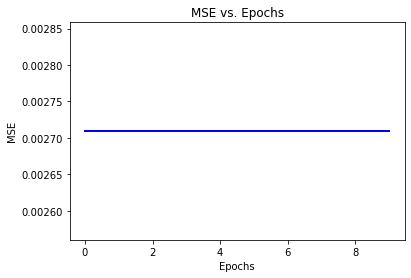

In [39]:
plt.xlabel('Epochs')
plt.ylabel('MSE') 
#plt.xticks(x)
plt.title('MSE vs. Epochs') 
x = np.arange(0,epochs,1)
plt.plot(x,MSE_array,color='blue', linewidth=2, markersize=12)

### Computation needs a lot of time so the final results will saved as csv files to carry the program each time after this part.

In [ ]:
W1_final = W1
W2_final = W2
W3_final = W3

W1.tofile('W1.csv', sep = ',')
W2.tofile('W2.csv', sep = ',')
W3.tofile('W3.csv', sep = ',')

### To read the saved Matricies

In [ ]:
#To relaod the Matricies:
W1 = np.array(pd.read_csv("W1.csv"))
W2 = np.array(pd.read_csv("W2.csv"))
W3 = np.array(pd.read_csv("W3.csv"))

## Test and Evalaute the results

### Function predict: create a simple predict function to predict the results using the final weights of the network

In [ ]:
def model_predict(X_):
    X_ = add_bias(X_) 
    Y1_ = add_bias(forward_prop(W1, X_)) 
    Y2_ = add_bias(forward_prop(W2,Y1_))
    output_ = forward_prop(W3,Y2_ex)
    return output_

### We can test and take many random inputs from the the datase, print it as an image and see the predicted value given by the neural network.

#### Print random pics with their predictions

output test [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
desired values [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


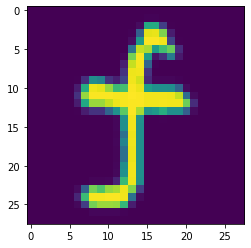

In [137]:
nb = np.random.randint(train_X.shape[0])
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X_ex = add_bias(train_X[nb,:])
Y_ex = model_predict(X_ex)
value_ex = np.argmax(Y_ex)
desired_ex = 
        
print("output test" ,output_ex)
print("desired values", Y_ex)

In [ ]:
nb = np.random.randint(train_X.shape[0])
arr = np.reshape(train_X[nb,:], (28,28)).T
plt.imshow(arr)

X_ex = add_bias(train_X[nb,:])
Y_ex = train_Y_matrix[nb]


Y1_ex = add_bias(forward_prop(W1, X_ex)) 
Y2_ex = add_bias(forward_prop(W2,Y1_ex))
output_ex = forward_prop(W3,Y2_ex)


print("output test" ,output_ex)
print("desired values", Y_ex)

#### Let's try on the test dataset, how many predictions will be correct?

output test [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
desired values [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


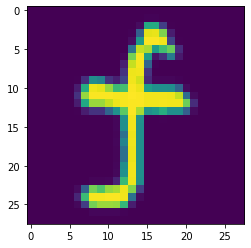

In [137]:
X_ = add_bias(test_X[,:]) 
#take all test inputs

#add bias to all rows 


#calculate the ouput susing the model

#compare to the real labesl from test_y
Y_ = test_Y_matrix[nb]


#calcualte the % of error in reutls


#use np.argmax to see the predicted value

#print the error percantage


Y1_ex = add_bias(forward_prop(W1, X_ex)) 
Y2_ex = add_bias(forward_prop(W2,Y1_ex))
output_ex = forward_prop(W3,Y2_ex)


print("output test" ,output_ex)
print("desired values", Y_ex)

In [ ]:
if (np.argmax(desired) == np.armax(outpu) ):
    true result
    else false